# Other metadata

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import functools
import matplotlib as mpl
%matplotlib inline
inline_rc = dict(mpl.rcParams)

# Read in  data

In [17]:
#read in untagged content to describe content with no taxons

untagged = pd.read_csv('../../data/untagged_content.csv')
untagged['first_published_at'] = pd.to_datetime(untagged['first_published_at'])
untagged.index = untagged['first_published_at']

In [2]:
labelled = pd.read_csv('../../data/labelled.csv')

In [3]:
filtered = pd.read_csv('../../data/filtered.csv')

In [4]:
taxons = pd.read_csv('../../data/clean_taxons.csv')

In [5]:
level1_tagged = pd.read_csv('../../data/labelled_level1.csv')
level1_tagged['first_published_at'] = pd.to_datetime(level1_tagged['first_published_at'])
level1_tagged.index = level1_tagged['first_published_at']

In [6]:
level2_tagged = pd.read_csv('../../data/labelled_level2.csv')
level2_tagged['first_published_at'] = pd.to_datetime(level2_tagged['first_published_at'])
level2_tagged.index = level2_tagged['first_published_at']

In [11]:
f_singlelabel = filtered.drop_duplicates('content_id').reset_index(drop=True)
print(f_singlelabel['first_published_at'][f_singlelabel['first_published_at'].str.contains('0001-01-01', na=False)])

f_singlelabel.drop(f_singlelabel.index[[75757]], inplace=True)
f_singlelabel['first_published_at'] = pd.to_datetime(f_singlelabel['first_published_at'])
f_singlelabel.index = f_singlelabel['first_published_at'] 

75757    0001-01-01T00:01:00.000+00:00
Name: first_published_at, dtype: object


In [14]:
l_singlelabel = labelled.drop_duplicates('content_id').reset_index(drop=True)


l_singlelabel['first_published_at'] = l_singlelabel['first_published_at'].str.replace('0001-01-01', '2001-01-01')

print(l_singlelabel['first_published_at'][l_singlelabel['first_published_at'].str.contains('0001-01-01', na=False)])

l_singlelabel.drop(l_singlelabel.index[[58843]], inplace=True)
l_singlelabel['first_published_at'] = pd.to_datetime(l_singlelabel['first_published_at'])
l_singlelabel.index = l_singlelabel['first_published_at']

Series([], Name: first_published_at, dtype: object)


### Untagged

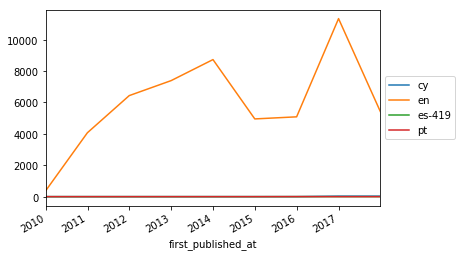

In [18]:
inline_rc = dict(mpl.rcParams)
grouped = untagged.groupby(['locale', pd.Grouper(freq='Y')])['first_published_at'].count()
count_by_year = grouped.unstack('locale', fill_value=0)

ax = count_by_year.plot()
ax.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2017-12-31'))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Publishing App
#### untagged

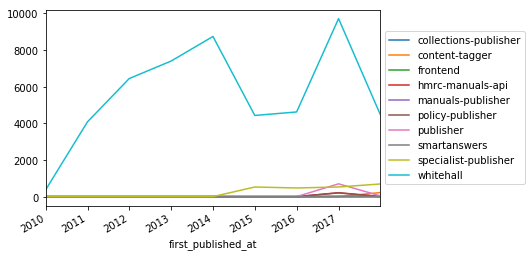

In [19]:
grouped = untagged.groupby(['publishing_app', pd.Grouper(freq='Y')])['first_published_at'].count()
count_by_year = grouped.unstack('publishing_app', fill_value=0)

ax = count_by_year.plot()
ax.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2017-12-31'))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Filtered

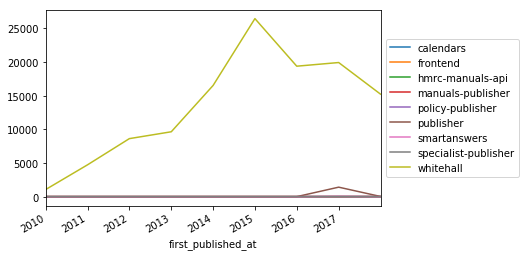

In [21]:
grouped = f_singlelabel.groupby(['publishing_app', pd.Grouper(freq='Y')])['first_published_at'].count()
count_by_year = grouped.unstack('publishing_app', fill_value=0)

ax = count_by_year.plot()
ax.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2017-12-31'))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### labelled

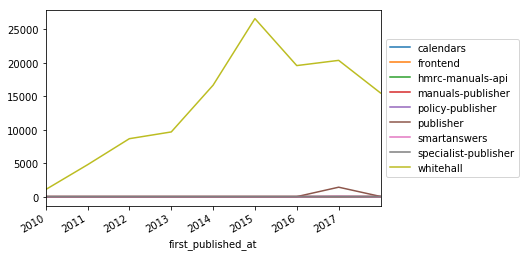

In [23]:
grouped = l_singlelabel.groupby(['publishing_app', pd.Grouper(freq='Y')])['first_published_at'].count()
count_by_year = grouped.unstack('publishing_app', fill_value=0)

ax = count_by_year.plot()
ax.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2017-12-31'))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### level1 tagged

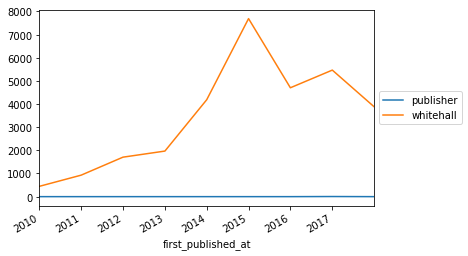

In [24]:
grouped = level1_tagged.groupby(['publishing_app', pd.Grouper(freq='Y')])['first_published_at'].count()
count_by_year = grouped.unstack('publishing_app', fill_value=0)

ax = count_by_year.plot()
ax.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2017-12-31'))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### level2 tagged

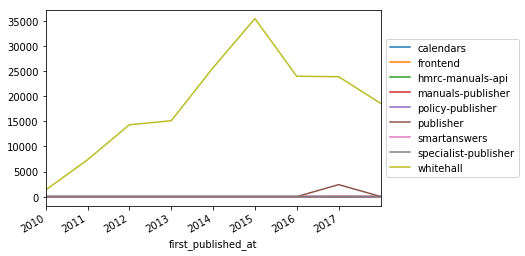

In [25]:
grouped = level2_tagged.groupby(['publishing_app', pd.Grouper(freq='Y')])['first_published_at'].count()
count_by_year = grouped.unstack('publishing_app', fill_value=0)

ax = count_by_year.plot()
ax.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2017-12-31'))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### primary publishing organisation

#### untagged

Text(0.5,1,'Percent unlabelled')

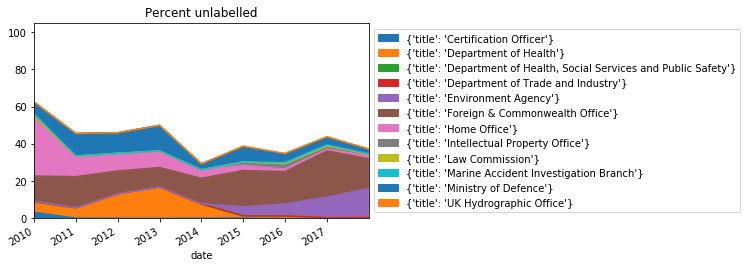

In [26]:
grouped = untagged.groupby(['primary_publishing_organisation', pd.Grouper(freq='Y')])['first_published_at'].count()
count_by_year = grouped.unstack('primary_publishing_organisation', fill_value=0)
# ax = count_by_year.plot()
# ax.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2017-12-31'))
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

df = count_by_year.stack().reset_index()
df.columns = ['date', 'primary_publishing_organisation', 'percent']
bydoctype_year = df.groupby(['date', 'primary_publishing_organisation']).agg({'percent': 'sum'})
# Change: groupby state_office and divide by sum
bydoctype_pcts = bydoctype_year.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).unstack('primary_publishing_organisation', fill_value=0)

bydoctype_pcts.columns = bydoctype_pcts.columns.droplevel(0)
top_pct = bydoctype_pcts.loc[:,bydoctype_pcts.max() > 15]
top_pct.columns.values

lab = top_pct.plot(kind='area', stacked=True)
lab.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2017-12-31'))
lab.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Percent unlabelled")

### labelled

Text(0.5,1,'Percent unlabelled')

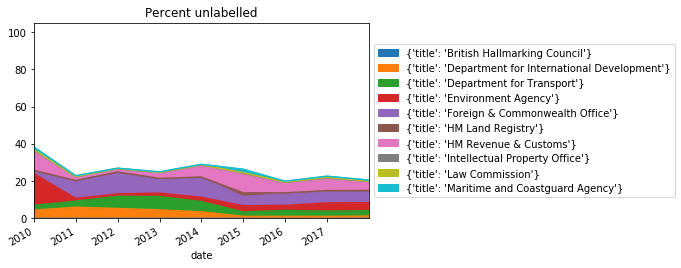

In [27]:
grouped = l_singlelabel.groupby(['primary_publishing_organisation', pd.Grouper(freq='Y')])['first_published_at'].count()
count_by_year = grouped.unstack('primary_publishing_organisation', fill_value=0)
# ax = count_by_year.plot()
# ax.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2017-12-31'))
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

df = count_by_year.stack().reset_index()
df.columns = ['date', 'primary_publishing_organisation', 'percent']
bydoctype_year = df.groupby(['date', 'primary_publishing_organisation']).agg({'percent': 'sum'})
# Change: groupby state_office and divide by sum
bydoctype_pcts = bydoctype_year.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).unstack('primary_publishing_organisation', fill_value=0)

bydoctype_pcts.columns = bydoctype_pcts.columns.droplevel(0)
top_pct = bydoctype_pcts.loc[:,bydoctype_pcts.max() > 15]
top_pct.columns.values

lab = top_pct.plot(kind='area', stacked=True)
lab.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2017-12-31'))
lab.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Percent unlabelled")